Random crops, flips, Affine, C Saturation, Contrast,
Brightness, and Hue

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model = Sequential()

# Conv 01 Layer
model.add(Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())



# Conv 02 Layer
model.add(Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Conv 03 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())


# Conv 04 Layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())



# Conv 05 Layer
model.add(Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))

model.add(MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())


# Flatten Layer
model.add(Flatten())


# Dense 01
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 02
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Dense 03
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())


# Final Layer
model.add(Dense(9, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [ ]:
optimizer = legacy.SGD(learning_rate=0.01, decay=0.005,momentum=0.9)

model.compile(optimizer=optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
datasets_directory = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration"

In [ ]:
batch_size = 128

In [ ]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2, 
                                        zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2, 
                                         fill_mode="nearest"
                                        )

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

In [ ]:
trainDatasets = train_dataGenerator.flow_from_directory(datasets_directory+"/Train", 
                                                       target_size=(224, 224),
                                                       batch_size=128, 
                                                       class_mode="categorical")

validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/Test", 
                                                       target_size=(224, 224),
                                                       batch_size=32, 
                                                       class_mode="categorical")

Found 2247 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
classInformation = trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
classSamplesT = trainDatasets.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Validation Data Samples: {}".format(classSamplesV))

Training Data Samples: 2247
Validation Data Samples: 118


In [ ]:
weghtPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weghtPath, monitor="val_accuracy", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [ ]:
history = model.fit(trainDatasets, 
                   steps_per_epoch = classSamplesT//128, 
                   validation_data=validationDatasets, 
                   epochs=20, 
                   validation_steps=classSamplesV//32, 
                   callbacks=callBacksList)

Epoch 1/20
17/17 [==============================] - ETA: 0s - loss: 2.4627 - accuracy: 0.2780 
Epoch 1: val_accuracy improved from -inf to 0.05208, saving model to best_weights_9.hdf5
17/17 [==============================] - 906s 53s/step - loss: 2.4627 - accuracy: 0.2780 - val_loss: 129.8428 - val_accuracy: 0.0521
Epoch 2/20
17/17 [==============================] - ETA: 0s - loss: 2.0805 - accuracy: 0.3539
Epoch 2: val_accuracy improved from 0.05208 to 0.11458, saving model to best_weights_9.hdf5
17/17 [==============================] - 78s 5s/step - loss: 2.0805 - accuracy: 0.3539 - val_loss: 185.2011 - val_accuracy: 0.1146
Epoch 3/20
17/17 [==============================] - ETA: 0s - loss: 1.8803 - accuracy: 0.4153
Epoch 3: val_accuracy improved from 0.11458 to 0.14583, saving model to best_weights_9.hdf5
17/17 [==============================] - 76s 5s/step - loss: 1.8803 - accuracy: 0.4153 - val_loss: 77.5757 - val_accuracy: 0.1458
Epoch 4/20
17/17 [==============================] 

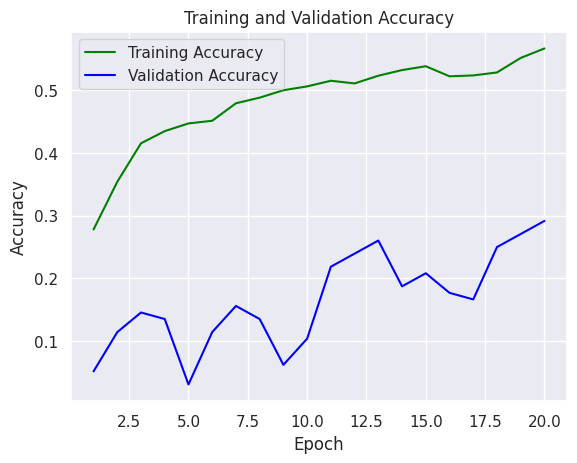

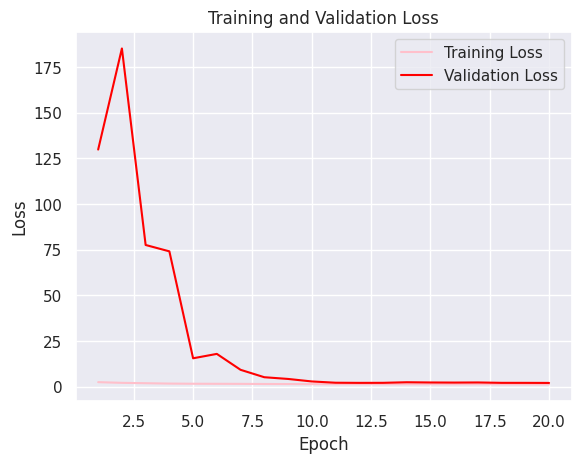

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Data Augmentation

In [ ]:
file_names = os.listdir(datasets_directory+"/Train/actinic keratosis")
print(file_names)

['ISIC_0025957.jpg', 'ISIC_0025780.jpg', 'ISIC_0026457.jpg', 'ISIC_0026040.jpg', 'ISIC_0026171.jpg', 'ISIC_0025992.jpg', 'ISIC_0026212.jpg', 'ISIC_0025953.jpg', 'ISIC_0026194.jpg', 'ISIC_0026149.jpg', 'ISIC_0025825.jpg', 'ISIC_0025803.jpg', 'ISIC_0028820.jpg', 'ISIC_0027896.jpg', 'ISIC_0028558.jpg', 'ISIC_0026650.jpg', 'ISIC_0028370.jpg', 'ISIC_0027580.jpg', 'ISIC_0027650.jpg', 'ISIC_0026709.jpg', 'ISIC_0026984.jpg', 'ISIC_0027536.jpg', 'ISIC_0027172.jpg', 'ISIC_0026625.jpg', 'ISIC_0026848.jpg', 'ISIC_0026905.jpg', 'ISIC_0027447.jpg', 'ISIC_0026702.jpg', 'ISIC_0028076.jpg', 'ISIC_0027950.jpg', 'ISIC_0026729.jpg', 'ISIC_0027254.jpg', 'ISIC_0028517.jpg', 'ISIC_0027958.jpg', 'ISIC_0027334.jpg', 'ISIC_0027452.jpg', 'ISIC_0026575.jpg', 'ISIC_0026468.jpg', 'ISIC_0026857.jpg', 'ISIC_0027884.jpg', 'ISIC_0027615.jpg', 'ISIC_0028190.jpg', 'ISIC_0027829.jpg', 'ISIC_0028393.jpg', 'ISIC_0027802.jpg', 'ISIC_0026765.jpg', 'ISIC_0027562.jpg', 'ISIC_0026626.jpg', 'ISIC_0028063.jpg', 'ISIC_0027668.jpg',

In [ ]:
for file_name in file_names:
    print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/actinic keratosis", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/actinic keratosis", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())


ISIC_0025957.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg
ISIC_0025780.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg
ISIC_0026457.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026457.jpg
ISIC_0026040.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026040.jpg
ISIC_0026171.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026171.jpg
ISIC_0025992.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025992.jpg
ISIC_0026212.jpg
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026

In [ ]:
file_names = os.listdir(datasets_directory+"/Train/basal cell carcinoma")
print(file_names)

['ISIC_0024590.jpg', 'ISIC_0024515.jpg', 'ISIC_0024665.jpg', 'ISIC_0024582.jpg', 'ISIC_0024673.jpg', 'ISIC_0024572.jpg', 'ISIC_0024573.jpg', 'ISIC_0024743.jpg', 'ISIC_0024564.jpg', 'ISIC_0024504.jpg', 'ISIC_0024632.jpg', 'ISIC_0024634.jpg', 'ISIC_0024666.jpg', 'ISIC_0024595.jpg', 'ISIC_0024787.jpg', 'ISIC_0024550.jpg', 'ISIC_0024984.jpg', 'ISIC_0024799.jpg', 'ISIC_0024848.jpg', 'ISIC_0025301.jpg', 'ISIC_0025417.jpg', 'ISIC_0025433.jpg', 'ISIC_0024949.jpg', 'ISIC_0025711.jpg', 'ISIC_0025691.jpg', 'ISIC_0024829.jpg', 'ISIC_0025718.jpg', 'ISIC_0025467.jpg', 'ISIC_0025046.jpg', 'ISIC_0025630.jpg', 'ISIC_0025557.jpg', 'ISIC_0025019.jpg', 'ISIC_0024833.jpg', 'ISIC_0024795.jpg', 'ISIC_0025576.jpg', 'ISIC_0025700.jpg', 'ISIC_0025752.jpg', 'ISIC_0024885.jpg', 'ISIC_0025144.jpg', 'ISIC_0025299.jpg', 'ISIC_0025362.jpg', 'ISIC_0025509.jpg', 'ISIC_0025731.jpg', 'ISIC_0025285.jpg', 'ISIC_0025266.jpg', 'ISIC_0024897.jpg', 'ISIC_0025513.jpg', 'ISIC_0025383.jpg', 'ISIC_0025601.jpg', 'ISIC_0025102.jpg',

In [ ]:
for file_name in file_names:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/basal cell carcinoma", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/basal cell carcinoma", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

ISIC_0024590.jpg
ISIC_0024515.jpg
ISIC_0024665.jpg
ISIC_0024582.jpg
ISIC_0024673.jpg
ISIC_0024572.jpg
ISIC_0024573.jpg
ISIC_0024743.jpg
ISIC_0024564.jpg
ISIC_0024504.jpg
ISIC_0024632.jpg
ISIC_0024634.jpg
ISIC_0024666.jpg
ISIC_0024595.jpg
ISIC_0024787.jpg
ISIC_0024550.jpg
ISIC_0024984.jpg
ISIC_0024799.jpg
ISIC_0024848.jpg
ISIC_0025301.jpg
ISIC_0025417.jpg
ISIC_0025433.jpg
ISIC_0024949.jpg
ISIC_0025711.jpg
ISIC_0025691.jpg
ISIC_0024829.jpg
ISIC_0025718.jpg
ISIC_0025467.jpg
ISIC_0025046.jpg
ISIC_0025630.jpg
ISIC_0025557.jpg
ISIC_0025019.jpg
ISIC_0024833.jpg
ISIC_0024795.jpg
ISIC_0025576.jpg
ISIC_0025700.jpg
ISIC_0025752.jpg
ISIC_0024885.jpg
ISIC_0025144.jpg
ISIC_0025299.jpg
ISIC_0025362.jpg
ISIC_0025509.jpg
ISIC_0025731.jpg
ISIC_0025285.jpg
ISIC_0025266.jpg
ISIC_0024897.jpg
ISIC_0025513.jpg
ISIC_0025383.jpg
ISIC_0025601.jpg
ISIC_0025102.jpg
ISIC_0025260.jpg
ISIC_0024931.jpg
ISIC_0025650.jpg
ISIC_0025644.jpg
ISIC_0025530.jpg
ISIC_0025322.jpg
ISIC_0025617.jpg
ISIC_0025031.jpg
ISIC_0026282.j

In [ ]:
file_names_derma = os.listdir(datasets_directory+"/Train/dermatofibroma")
#print(file_names_derma)
file_names_mel = os.listdir(datasets_directory+"/Train/melanoma")
file_names_nev = os.listdir(datasets_directory+"/Train/nevus")
file_names_pb = os.listdir(datasets_directory+"/Train/pigmented benign keratosis")
file_names_sk = os.listdir(datasets_directory+"/Train/seborrheic keratosis")
file_names_scc = os.listdir(datasets_directory+"/Train/squamous cell carcinoma")
file_names_vl = os.listdir(datasets_directory+"/Train/vascular lesion")

In [ ]:
for file_name in file_names_derma:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/dermatofibroma", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/dermatofibroma", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_mel:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/melanoma", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/melanoma", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_nev:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/nevus", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/nevus", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_pb:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/pigmented benign keratosis", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/pigmented benign keratosis", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_sk:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/seborrheic keratosis", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/seborrheic keratosis", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_scc:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/squamous cell carcinoma", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/squamous cell carcinoma", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
for file_name in file_names_vl:
    #print(file_name)
    # Construct the full path of the image file
    image_path = os.path.join(datasets_directory+"/Train/vascular lesion", file_name)
    #print(image_path)
    
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    
    # Apply the flip_left_right operation
    flipped = tf.image.flip_left_right(image)
    
    # Save the flipped image with a new file name
    flipped_image_path = os.path.join(datasets_directory+"/Train/vascular lesion", 'flipped_' + file_name)
    tf.io.write_file(flipped_image_path, tf.image.encode_png(flipped).numpy())

In [ ]:
def cropped(image_directory):
  for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    if 'flipped' in filename:
        image = tf.image.central_crop(image, central_fraction=0.5)
        cropped_image_path = os.path.join(image_directory, 'cropped_' + filename)
        tf.io.write_file(cropped_image_path, tf.image.encode_jpeg(image))


In [ ]:
cropped(datasets_directory+"/Train/actinic keratosis")

In [ ]:
cropped(datasets_directory+"/Train/basal cell carcinoma")
cropped(datasets_directory+"/Train/dermatofibroma")
cropped(datasets_directory+"/Train/melanoma")
cropped(datasets_directory+"/Train/nevus")

FileNotFoundError: ignored

In [ ]:
cropped(datasets_directory+"/Train/pigmented benign keratosis")
cropped(datasets_directory+"/Train/seborrheic keratosis")
cropped(datasets_directory+"/Train/squamous cell carcinoma")
cropped(datasets_directory+"/Train/vascular lesion")

In [ ]:
train_dataGenerator_aug = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2, 
                                        zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2, 
                                         fill_mode="nearest"
                                        )

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

trainDatasetsAug = train_dataGenerator_aug.flow_from_directory(datasets_directory+"/Train", 
                                                       target_size=(224, 224),
                                                       batch_size=256, 
                                                       class_mode="categorical")

validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/Test", 
                                                       target_size=(224, 224),
                                                       batch_size=32, 
                                                       class_mode="categorical")

Found 6741 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
classInformation = trainDatasetsAug.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
classSamplesT = trainDatasetsAug.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Validation Data Samples: {}".format(classSamplesV))

Training Data Samples: 6741
Validation Data Samples: 118


In [ ]:
weghtPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weghtPath, monitor="val_accuracy", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [ ]:
6741//256

26

In [ ]:
optimizer = legacy.SGD(learning_rate=0.01, decay=0.005,momentum=0.9)

model.compile(optimizer=optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(trainDatasetsAug, 
                   steps_per_epoch = classSamplesT//256, 
                   validation_data=validationDatasets, 
                   epochs=30, 
                   validation_steps=classSamplesV//32, 
                   callbacks=callBacksList)

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 2.2586 - accuracy: 0.2992
Epoch 1: val_accuracy improved from -inf to 0.13542, saving model to best_weights_9.hdf5
26/26 [==============================] - 252s 9s/step - loss: 2.2586 - accuracy: 0.2992 - val_loss: 251.7436 - val_accuracy: 0.1354
Epoch 2/30
26/26 [==============================] - ETA: 0s - loss: 1.7913 - accuracy: 0.4037
Epoch 2: val_accuracy improved from 0.13542 to 0.14583, saving model to best_weights_9.hdf5
26/26 [==============================] - 215s 8s/step - loss: 1.7913 - accuracy: 0.4037 - val_loss: 98.4995 - val_accuracy: 0.1458
Epoch 3/30
26/26 [==============================] - ETA: 0s - loss: 1.5874 - accuracy: 0.4518
Epoch 3: val_accuracy did not improve from 0.14583
26/26 [==============================] - 202s 8s/step - loss: 1.5874 - accuracy: 0.4518 - val_loss: 29.2810 - val_accuracy: 0.1354
Epoch 4/30
26/26 [==============================] - ETA: 0s - loss: 1.4729 - accuracy: 0.473

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: ignored